<a href="https://colab.research.google.com/github/The-Mechanic-3/Data-Driven-Aerospace/blob/Colab/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the data file allFaces.mat into sample_data folder.

import os
import subprocess  # For executing the wget command

# Define the path to the folder and the filename
folder_path = 'sample_data'
filename = 'allFaces.mat'
file_path = os.path.join(folder_path, filename)

# Check if the folder exists, if not, create it
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Check if the file exists in the specified folder
if not os.path.exists(file_path):
    # If the file doesn't exist, download it into the folder
    download_command = f"wget -P {folder_path} https://github.com/kursatkara/databook_python/raw/master/DATA/allFaces.mat"
    subprocess.run(download_command, shell=True, check=True)
else:
    print(f"{filename} file already exists in the {folder_path} folder.")


In [2]:
# Loat the data file allFaces.mat to mat_contents.
import scipy.io

# Load the mat file from the specified folder
mat_contents = scipy.io.loadmat(file_path)

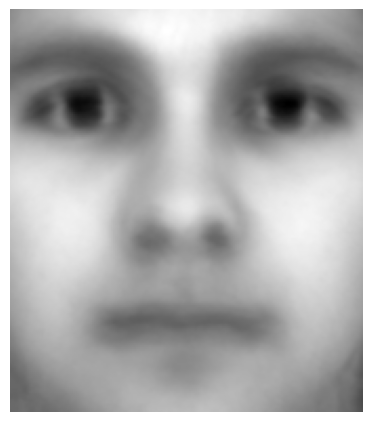

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

# Extract the necessary data
faces       = mat_contents['faces']
m           = int(np.squeeze(mat_contents['m']))
n           = int(np.squeeze(mat_contents['n']))
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# We use the first 36 people for training data
trainingFaces = faces[:,:np.sum(nfaces[:36])]

# Average of the training data
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1

# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')





plt.show()

Text(0.5, 1.0, 'Singular Values')

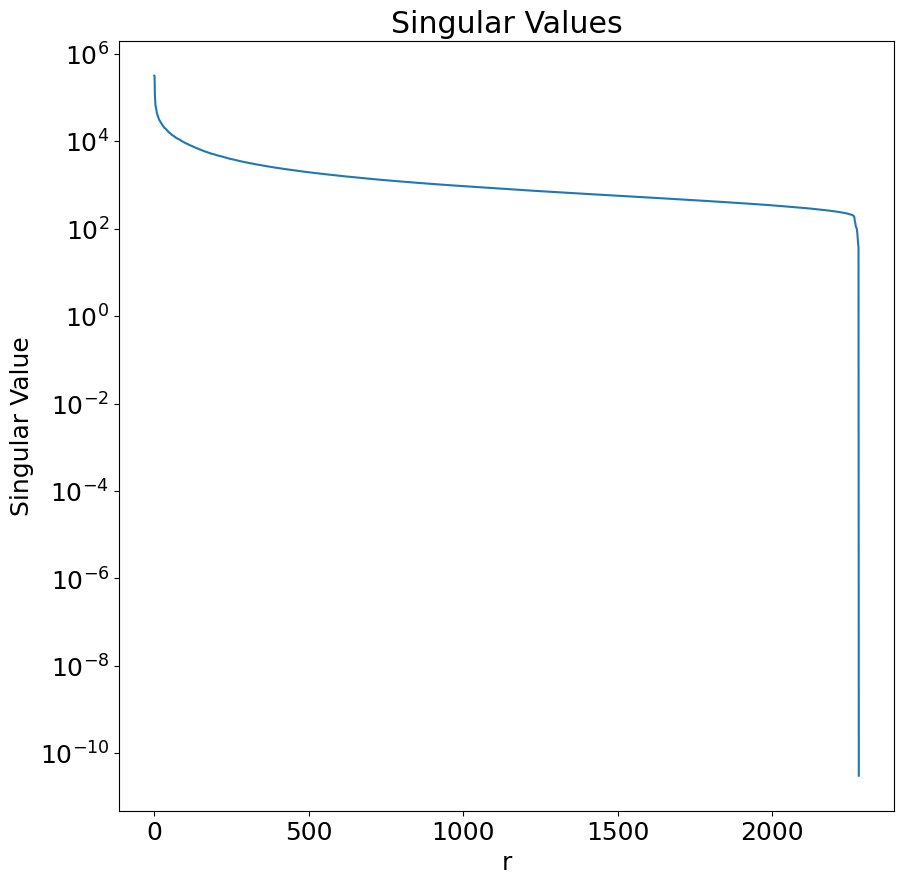

In [13]:
plt.semilogy(S)
plt.xlabel('r')
plt.ylabel('Singular Value')
plt.title('Singular Values')

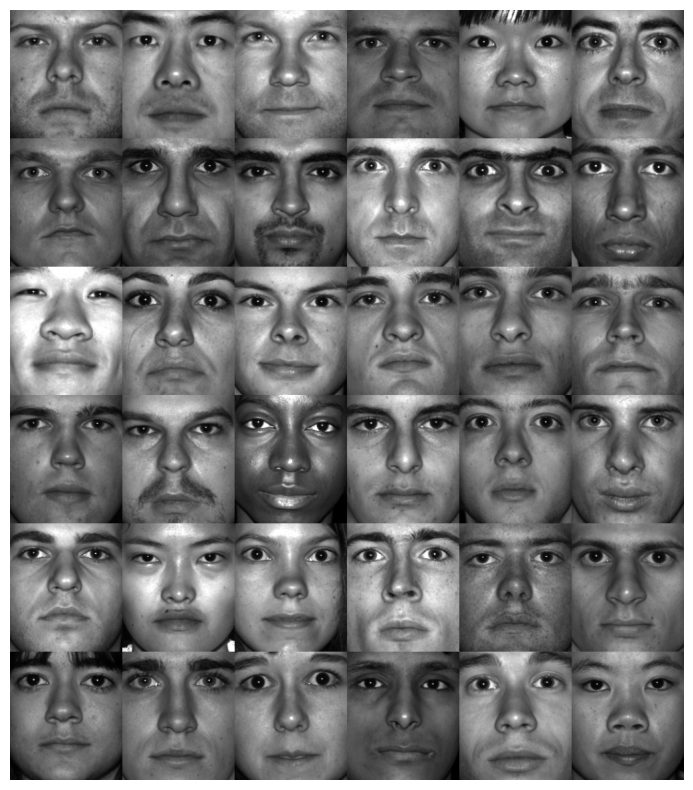

In [14]:
allPersons = np.zeros((n*6,m*6))
count      = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1

img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

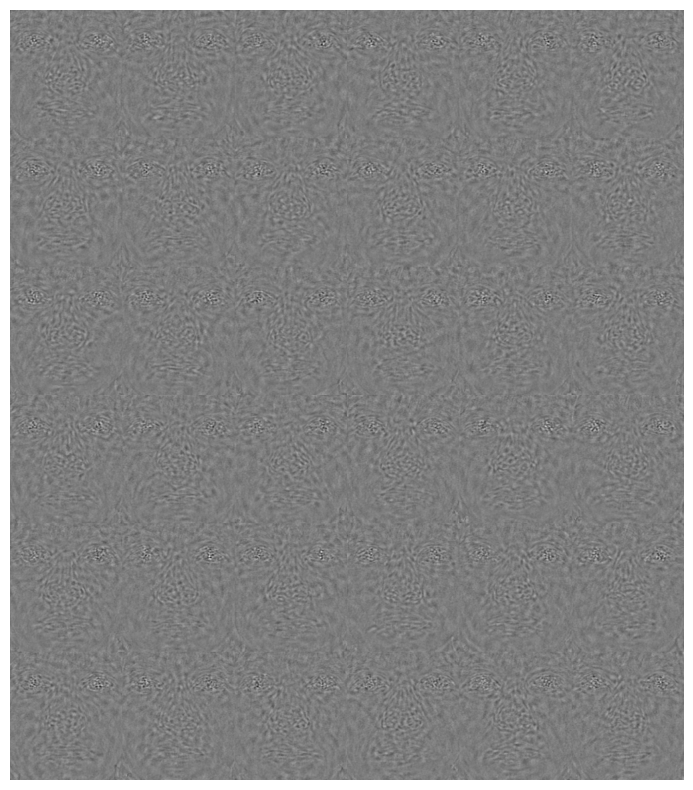

In [16]:
allPersons = np.zeros((n*6,m*6))
count = 700  # Start from the 700th column of U

for j in range(6):
    for k in range(6):
        if count < U.shape[1]:  # Ensure count is within bounds
            allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(U[:, count], (m,n)).T
            count += 1
        else:
            break  # Stop if count exceeds the number of columns in U

img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

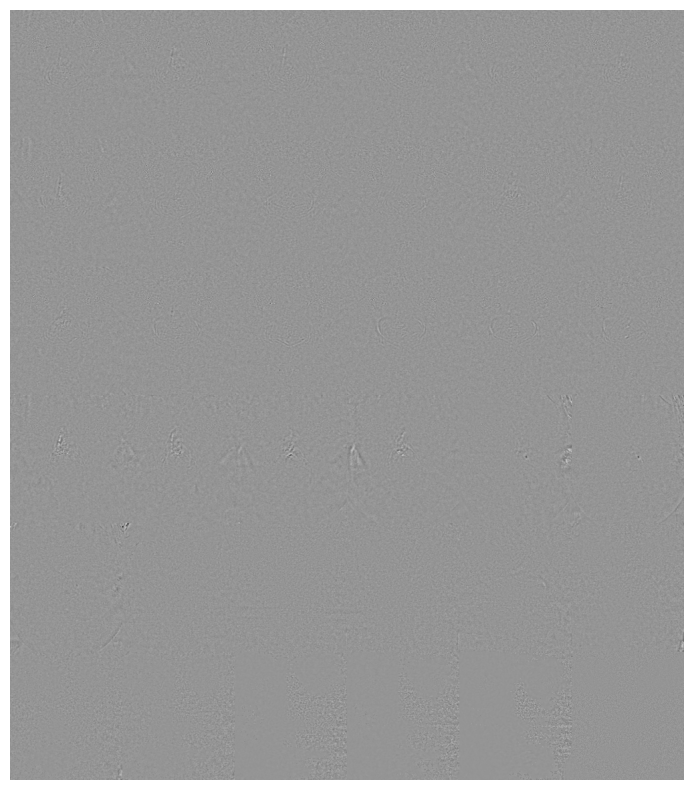

In [17]:
allPersons = np.zeros((n*6,m*6))
count = U.shape[1] - 36  # Start from the (total_columns - 36)th column

for j in range(6):
    for k in range(6):
        if count < U.shape[1]:  # Ensure count is within bounds
            allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(U[:, count], (m,n)).T
            count += 1
        else:
            break  # Stop if count exceeds the number of columns in U

img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()